# Decision Tree (Classification) from Scratch

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn import tree

In [7]:
golf = pd.read_csv("D:/12320158/Datasets/Golf.csv")

label_encoders = {}
for column in golf.columns[:-1]:  
    le = LabelEncoder()
    golf[column] = le.fit_transform(golf[column])
    label_encoders[column] = le

In [9]:
y_encoder = LabelEncoder()
golf[golf.columns[-1]] = y_encoder.fit_transform(golf[golf.columns[-1]])

X = golf.iloc[:, :-1].values  
y = golf.iloc[:, -1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    prob = counts / counts.sum()
    return -np.sum(prob * np.log2(prob))

In [13]:
def best_split(X, y):
    m, n = X.shape
    best_gain, best_feature, best_threshold = 0, None, None
    parent_entropy = entropy(y)
    for feature in range(n):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_idx = X[:, feature] <= threshold
            right_idx = ~left_idx
            if sum(left_idx) == 0 or sum(right_idx) == 0:
                continue
            left_entropy = entropy(y[left_idx])
            right_entropy = entropy(y[right_idx])
            weighted_entropy = (sum(left_idx) / m) * left_entropy + (sum(right_idx) / m) * right_entropy
            info_gain = parent_entropy - weighted_entropy
            if info_gain > best_gain:
                best_gain, best_feature, best_threshold = info_gain, feature, threshold
    return best_feature, best_threshold

In [15]:
def build_tree(X, y, depth=0, max_depth=5):
    if len(set(y)) == 1 or depth == max_depth:
        return Node(value=max(set(y), key=list(y).count))
    feature, threshold = best_split(X, y)
    if feature is None:
        return Node(value=max(set(y), key=list(y).count))
    left_idx = X[:, feature] <= threshold
    right_idx = ~left_idx
    left = build_tree(X[left_idx], y[left_idx], depth + 1, max_depth)
    right = build_tree(X[right_idx], y[right_idx], depth + 1, max_depth)
    return Node(feature, threshold, left, right)

print("Entropy : ", entropy(y))

Entropy :  0.9402859586706311


In [17]:
def predict_one(node, x):
    if node.value is not None:
        return node.value
    if x[node.feature] <= node.threshold:
        return predict_one(node.left, x)
    else:
        return predict_one(node.right, x)

def predict(tree, X):
    return np.array([predict_one(tree, x) for x in X])

# train 
root = build_tree(X_train, y_train, max_depth=5)
y_pred = predict(root, X_test)
# Plot Decision Tree 
#tree.plot_tree(root)

Accuracy: 100.00%
MSE: 0.0000, RMSE: 0.0000, R² Score: 1.0000


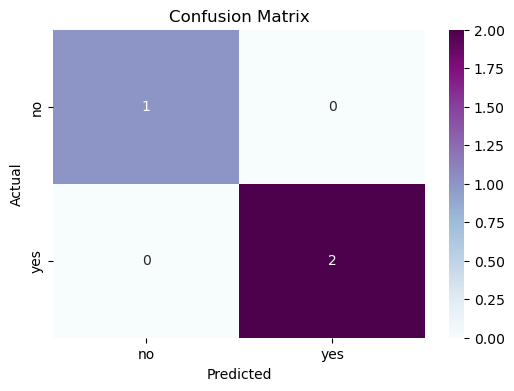

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

accuracy = (y_pred == y_test).mean() * 100
print(f'Accuracy: {accuracy:.2f}%')

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()